In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression

### Classification

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Regression

In [3]:
x = iris.iloc[:,0:4]
y = iris["species"]

In [4]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EPF

lr = LogisticRegression()
sel = EPF(lr,max_features=4, scoring="accuracy", cv=5)

In [5]:
# fitting the model
model = sel.fit(x,y)

C:\Users\rawat\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [6]:
# best modet score and features name
model.best_score_, model.best_feature_names_

(0.9733333333333334,
 ('sepal_length', 'sepal_width', 'petal_length', 'petal_width'))

In [7]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': 0.5666666666666667,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': 0.8133333333333332,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [8]:
# transforming to dataframe for efficent study
metric_df = pd.DataFrame(model.get_metric_dict()).T
metric_df.sort_values("avg_score",ascending=False).head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal_length, sepal_width, petal_length, peta...",0.032061,0.024944,0.012472
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal_length, petal_length, petal_width)",0.027096,0.021082,0.010541
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal_width, petal_length, petal_width)",0.027096,0.021082,0.010541
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, sepal_width, petal_length)",0.051412,0.04,0.02


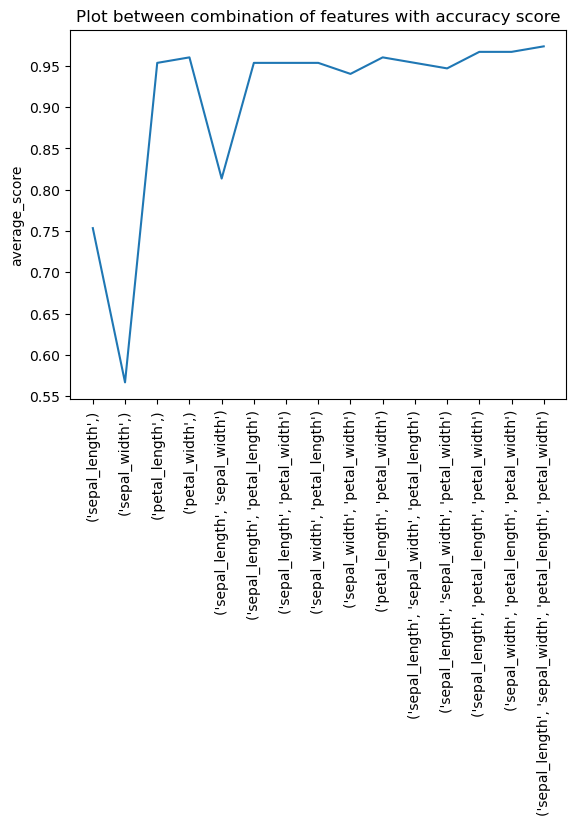

In [9]:
# plotting each combination with accuracy score
plt.plot([str(k) for k in metric_df["feature_names"]], metric_df["avg_score"])
plt.title("Plot between combination of features with accuracy score")
plt.ylabel("average_score")
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["medv"], test_size=.2, random_state=1)

In [12]:
# shape of training and test data
x_train.shape, x_test.shape, y_train.shape

((404, 13), (102, 13), (404,))

In [13]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [14]:
from sklearn.preprocessing import StandardScaler

std_scalor = StandardScaler()
X_train = std_scalor.fit_transform(x_train)
X_test = std_scalor.transform(x_test)

In [15]:
from sklearn.metrics import r2_score
lin_model = LinearRegression()

print("Training", np.mean(cross_val_score(lin_model, X_train, y_train,cv=5, scoring="r2")))
print("Test", np.mean(cross_val_score(lin_model, X_test, y_test,cv=5,  scoring="r2")))

Training 0.7025123301096213
Test 0.6514899901155403


In [17]:
lr_model1 = LinearRegression()

efs = EPF(lr_model1, max_features=13, scoring="r2", cv=10, print_progress=True, n_jobs=1)

selector = efs.fit(X_train, y_train)

Features: 8191/8191

In [18]:
selector.best_score_, selector.best_feature_names_

(0.6827988156800064, ('0', '1', '4', '5', '7', '8', '9', '10', '11', '12'))

In [20]:
met_df = pd.DataFrame(selector.get_metric_dict()).T
met_df.sort_values("avg_score", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291967, 0.5742220049707853, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985804, 0.5752245789381262, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119795, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726774, 0.5751761822045902, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.87178313639277, 0.5819307800982587, 0.46239...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756
...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760348, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917
49,"(3, 7)","[-0.0371219722713414, -0.16717603954280014, 0....",0.057453,"(3, 7)",0.09446,0.127183,0.042394
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986


In [21]:
def adjusted_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features -1 )
    return 1 - (1 - r2) * coef

In [27]:
met_df["observation"] = 404
met_df["num_features"] = met_df["feature_idx"].apply(lambda x: len(x))
met_df["adjusted_r2"] = adjusted_r2(met_df["avg_score"], met_df["observation"], met_df["num_features"])

In [29]:
met_df.sort_values("adjusted_r2", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observation,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291967, 0.5742220049707853, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.87178313639277, 0.5819307800982587, 0.46239...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985804, 0.5752245789381262, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119795, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726774, 0.5751761822045902, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760348, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.16717603954280014, 0....",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [31]:
X_train_sel = selector.transform(x_train)
X_test_sel = selector.transform(x_test)

lin_model2 = LinearRegression()
lin_model2.fit(X_train_sel,y_train)

print("Training score after exhaustive feature selector ==>", np.mean(cross_val_score(lin_model2, X_train_sel, y_train,
                                                                                     cv=5, scoring="r2")))

print("Training score after exhaustive feature selector ==>", np.mean(cross_val_score(lin_model2, X_test_sel, y_test,
                                                                                     cv=5, scoring="r2")))

Training score after exhaustive feature selector ==> 0.7100327839218569
Training score after exhaustive feature selector ==> 0.72058192961245


In [34]:
print("Improvement in model after performing feature selection ==>", 0.72058192961245 - 0.6514899901155403)

Improvement in model after performing feature selection ==> 0.06909193949690973


###    Sequential Backward Selection

In [36]:
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load dataset
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [37]:
# seperating target variable
x = data.iloc[:, :-1]
y = data["medv"]

# splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=1)

In [38]:
std_scal = StandardScaler()
X_train = std_scal.fit_transform(X_train)
X_test = std_scal.transform(X_test)

mod = LinearRegression()

print("Training ==>", np.mean(cross_val_score(mod, X_train, Y_train,cv=5, scoring="r2")))
print("Test ==>", np.mean(cross_val_score(mod, X_test, Y_test,cv=5,  scoring="r2")))

Training ==> 0.7025123301096213
Test ==> 0.6514899901155403


In [41]:
lr = LinearRegression()

sfs = SFS(lr, k_features="best", forward=True, floating=False, scoring="r2", cv=5)
sfs.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [45]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753016, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774327, 0.6473449858158778, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310515, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407365, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718952, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


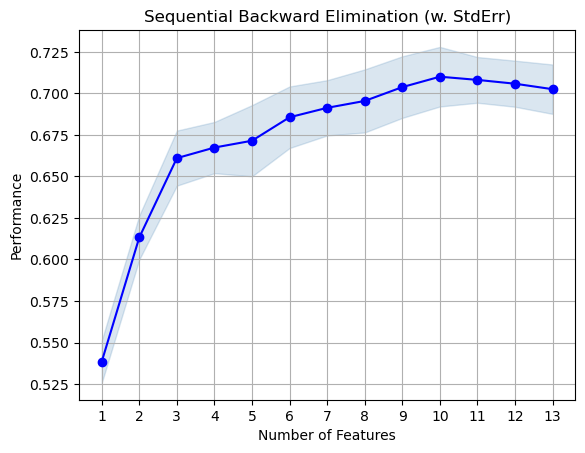

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sf

fig = plot_sf(sfs.get_metric_dict(), kind="std_err")
plt.title("Sequential Backward Elimination (w. StdErr)")
plt.grid()
plt.show()

In [ ]:
x_train_selc = sfs.transform(X_test)
x_test_selc = sfs.transform(X_test)

linear_reg = LinearRegression()

print("training after forward selection: ===>",np.mean(cross_val_score(linear_reg, x_train_selc, y_train, cv=5,
                                                                       scoring='r2')))
print("testing after forward selection: ==>",np.mean(cross_val_score(model, x_test_selc, y_test, cv=5, scoring='r2')))

### Using Sklearn

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs2 = SFS(linear_reg,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)